In [1]:
import sys
sys.path.append('/Volumes/yyx_DISK/despotic')
sys.path.append('/Volumes/yyx_DISK/mcmc_code')
import wind_obs_diag_pkg as wodp
import os 
os.environ["DESPOTIC_HOME"] = "/Volumes/yyx_DISK/despotic"
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
from matplotlib.colors import LogNorm
from scipy.optimize import brentq
import matplotlib.cm as cm
import matplotlib.colors as colors
from despotic import emitter
from despotic.winds import pwind, zetaM, sxMach, pM


# Constants; switch to cgs
from scipy.constants import G, c, m_p, m_e, h
from scipy.constants import k as kB
from astropy.units import Msun, yr, Angstrom, pc
# interact
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import emcee

#import wind_obs_diag_pkg_interact as wodpi
#import yt
c = 1e2*c
hP = h*1e7
G = 1e3*G
kB = 1e7*kB
mH = (m_e + m_p)*1e3
muH = 1.4
Msun = Msun.to('g')
yr = yr.to('s')
Myr = 1e6*yr
Gyr = 1e9*yr
ang = Angstrom.to('cm')
pc = pc.to('cm')
kpc = 1e3*pc

# Fiducial parameters
mdotstar = 4.1*Msun/yr
epsff = 0.01
v0 = 120e5*np.sqrt(2)
r0 = 250*pc
m0 = v0**2*r0/(2.0*G)
rho0 = 3.0*m0/(4.0*np.pi*r0**3)
tc = r0/v0
dist = 3.5e3*kpc

In [2]:
%time
# emission spectra
interact(wodpi.em_line_spec_show, line = ['CO_1-0','CO_2-1','HI','Halpha'], temp=[50,5000],
         phi=-2.53488255,#(-60.0, 60.0, 1.0), 
         theta_in=10.6528097,#(0., 90.0, 1.0), 
         theta_out=87.90105741,#(10., 90.0, 1.0), 
         pos_t=(-2,2,0.1), pos_a = (-2.4, 2.4, 0.1), 
         driver = ['ideal','radiation','hot'], 
         uh=(2.,30.,1.), 
         tau0 = (0.,100.,1.), 
         lg_mdot=(0.1, 2., 0.1),
         expansion=['area', 'intermediate', 'solid angle'], pot = ['point', 'isothermal'], 
         fc = (0.8, 1, 0.02), mach=[7.4, 30, 100, 1000, 1e4, 1e5])



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnbGluZScsIG9wdGlvbnM9KCdDT18xLTAnLCAnQ09fMi0xJywgJ0hJJywgJ0hhbHBoYScpLCB2YWx1ZT0nQ09fMS3igKY=


<function wind_obs_diag_pkg_interact.em_line_spec_show>

Gamma=0.41941055
[<despotic.winds.pwind.pwind object at 0x102c7eb50>, array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.8787

49
[0.030303030303030276, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405390610160]
50
[0.09090909090909083, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405390610160]
51
[0.15151515151515138, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405390610160]
52
[0.21212121212121238, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405390610160]
53
[0.27272727272727293, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405390610160]
54
[0.3333333333333335, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405390610160]
55
[0.39393939393939403, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405390

23
[-1.5454545454545454, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056209585372099, 4.0, 0.0, False, 140405432066320]
24
[-1.4848484848484849, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056209585372099, 4.0, 0.0, False, 140405432066320]
25
[-1.4242424242424243, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056209585372099, 4.0, 0.0, False, 140405432066320]
26
[-1.3636363636363635, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056209585372099, 4.0, 0.0, False, 140405432066320]
27
[-1.303030303030303, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056209585372099, 4.0, 0.0, False, 140405432066320]
28
[-1.2424242424242424, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056209585372099, 4.0, 0.0, False, 140405432066320]
29
[-1.1818181818181817, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056209585372099, 4.0, 0.0, False, 1404054320

11
[-2.2727272727272725, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056702113273125, 4.0, 0.0, False, 140405434619536]
12
[-2.212121212121212, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056702113273125, 4.0, 0.0, False, 140405434619536]
13
[-2.1515151515151514, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056702113273125, 4.0, 0.0, False, 140405434619536]
14
[-2.090909090909091, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056702113273125, 4.0, 0.0, False, 140405434619536]
15
[-2.0303030303030303, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056702113273125, 4.0, 0.0, False, 140405434619536]
16
[-1.9696969696969697, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056702113273125, 4.0, 0.0, False, 140405434619536]
17
[-1.9090909090909092, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056702113273125, 4.0, 0.0, False, 14040543461

98
[3.0, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056702113273125, 4.0, 0.0, False, 140405434619536]
99
[1.10318683e-08 1.19674035e-07 4.94771463e-07 1.35103098e-06
 2.93306841e-06 5.50761096e-06 9.36642209e-06 1.48292579e-05
 2.22485482e-05 3.20127000e-05 4.45562182e-05 6.03620815e-05
 7.99970165e-05 1.04102759e-04 1.33410404e-04 1.68769528e-04
 2.11162214e-04 2.61736181e-04 3.21774583e-04 3.92843356e-04
 4.76851580e-04 5.75784195e-04 6.92176546e-04 8.27126703e-04
 9.80821513e-04 1.15698336e-03 1.35809382e-03 1.58630629e-03
 1.84709786e-03 2.14663374e-03 2.48777384e-03 2.87811531e-03
 3.32390416e-03 3.83328997e-03 4.42068847e-03 5.06860162e-03
 5.80397432e-03 6.63056917e-03 7.54282771e-03 8.53911111e-03
 9.60971540e-03 1.07336767e-02 1.18882864e-02 1.30380641e-02
 1.41401604e-02 1.51543410e-02 1.60270622e-02 1.67209524e-02
 1.72027945e-02 1.74495628e-02 3.06940988e-02 3.03628607e-02
 2.97094474e-02 2.87570445e-02 2.75375647e-02 2.60929498e-02
 2.44759731e-02

44
[-0.2727272727272725, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.605669489078818, 4.0, 0.0, False, 140405432945568]
45
[-0.21212121212121193, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.605669489078818, 4.0, 0.0, False, 140405432945568]
46
[-0.15151515151515138, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.605669489078818, 4.0, 0.0, False, 140405432945568]
47
[-0.09090909090909083, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.605669489078818, 4.0, 0.0, False, 140405432945568]
48
[-0.030303030303030276, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.605669489078818, 4.0, 0.0, False, 140405432945568]
49
[0.030303030303030276, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.605669489078818, 4.0, 0.0, False, 140405432945568]
50
[0.09090909090909083, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.605669489078818, 4.0, 0.0, False, 1404054329

4
[-2.696969696969697, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056693380789473, 4.0, 0.0, False, 140405432286384]
5
[-2.6363636363636362, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056693380789473, 4.0, 0.0, False, 140405432286384]
6
[-2.5757575757575757, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056693380789473, 4.0, 0.0, False, 140405432286384]
7
[-2.515151515151515, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056693380789473, 4.0, 0.0, False, 140405432286384]
8
[-2.4545454545454546, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056693380789473, 4.0, 0.0, False, 140405432286384]
9
[-2.393939393939394, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056693380789473, 4.0, 0.0, False, 140405432286384]
10
[-2.333333333333333, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056693380789473, 4.0, 0.0, False, 140405432286384]
11

69
[1.2424242424242422, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056693380789473, 4.0, 0.0, False, 140405432286384]
70
[1.3030303030303028, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056693380789473, 4.0, 0.0, False, 140405432286384]
71
[1.3636363636363633, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056693380789473, 4.0, 0.0, False, 140405432286384]
72
[1.4242424242424248, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056693380789473, 4.0, 0.0, False, 140405432286384]
73
[1.4848484848484853, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056693380789473, 4.0, 0.0, False, 140405432286384]
74
[1.5454545454545459, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056693380789473, 4.0, 0.0, False, 140405432286384]
75
[1.6060606060606064, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056693380789473, 4.0, 0.0, False, 140405432286384]

[1.3636363636363633, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405432281872]
72
[1.4242424242424248, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405432281872]
73
[1.4848484848484853, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405432281872]
74
[1.5454545454545459, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405432281872]
75
[1.6060606060606064, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405432281872]
76
[1.666666666666667, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405432281872]
77
[1.7272727272727275, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405432281872]
78


16
[-1.9696969696969697, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435632240]
17
[-1.9090909090909092, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435632240]
18
[-1.8484848484848484, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435632240]
19
[-1.7878787878787878, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435632240]
20
[-1.7272727272727273, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435632240]
21
[-1.6666666666666665, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435632240]
22
[-1.606060606060606, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 1404054356

79
[1.8484848484848486, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435632240]
80
[1.9090909090909092, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435632240]
81
[1.9696969696969697, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435632240]
82
[2.0303030303030303, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435632240]
83
[2.090909090909091, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435632240]
84
[2.1515151515151514, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435632240]
85
[2.212121212121212, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435632240]
8

/Users/yuxuan/Documents/Research_module/despotic/despotic/winds/pwind.py:2273: UserWarning: pwind: warning: roundoff error
  warn("pwind: warning: "+str(val))


3
[-2.757575757575758, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435715744]
4
[-2.696969696969697, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435715744]
5
[-2.6363636363636362, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435715744]
6
[-2.5757575757575757, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435715744]
7
[-2.515151515151515, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435715744]
8
[-2.4545454545454546, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435715744]
9
[-2.393939393939394, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435715744]
10


63
[0.8787878787878789, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435715744]
64
[0.9393939393939394, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435715744]
65
[1.0, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435715744]
66
[1.0606060606060606, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435715744]
67
[1.121212121212121, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435715744]
68
[1.1818181818181817, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435715744]
69
[1.2424242424242422, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435715744]
70
[1.303030303

2
[-2.8181818181818183, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435723664]
3
[-2.757575757575758, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435723664]
4
[-2.696969696969697, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435723664]
5
[-2.6363636363636362, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435723664]
6
[-2.5757575757575757, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435723664]
7
[-2.515151515151515, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435723664]
8
[-2.4545454545454546, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435723664]
9


60
[0.6969696969696972, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435723664]
61
[0.7575757575757578, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435723664]
62
[0.8181818181818183, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435723664]
63
[0.8787878787878789, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435723664]
64
[0.9393939393939394, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435723664]
65
[1.0, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435723664]
66
[1.0606060606060606, 21.35527865962868, 0.1458456484085297, 0.8014916766412712, True, 0.6056692741885247, 4.0, 0.0, False, 140405435723664]
67
[1.12121212

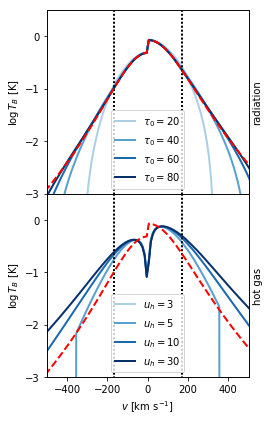

In [2]:
# thin=False
#######################################################################
# dependence on dm
#######################################################################
u = np.linspace(-3, 3, 40)
# CO emission profiles
dm_a = ['radiation', 'hot gas']
tau0_a = [20., 40., 60, 80]
uh_a = [3., 5., 10., 30]
pot = 'isothermal'
ex = 'area'
CO_TB_default, error = wodp.em_line_spec(line='CO_2_1', phi=0, theta_in=30, theta_out=60, pos_t=0, pos_a=1, driver = 'ideal', mdot=100,expansion=ex, pot=pot, fc = 1., u = u)
fig = plt.figure(2, figsize=(4,6))       
# Plot
norm = colors.Normalize(vmin=-0.5, vmax=1)
cmap = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('Blues'))
# radiation
plt.subplot(2, 1, 1)
for i, tau0 in enumerate(tau0_a):
    # Get rgb value for this tXtw
    rgb = cmap.to_rgba(float(i)/(len(tau0_a)-1))
    print(tau0)
    CO_TB, error = wodp.em_line_spec(line='CO_2_1', phi=0, theta_in=30, theta_out=60, 
                              pos_t=0, pos_a=1, driver = 'radiation', mdot=100, tau0=tau0,
                              expansion=ex, pot=pot, fc = 1., u = u)
    plt.plot(u*v0/1e5, np.log10(CO_TB+1e-30), color=rgb, lw=2, label=r'$\tau_0=%.0f$'%tau0)
    plt.plot(np.ones(2)*v0/1e5, [-4, 0.5], 'k:')
    plt.plot(-np.ones(2)*v0/1e5, [-4, 0.5], 'k:')
    plt.legend()
plt.plot(u*v0/1e5,np.log10(CO_TB_default+1e-30), 'r--', lw=2)
plt.xlim([-500, 500])
plt.ylim([-3, 0.5])
plt.gca().set_yticks([-3, -2, -1, 0])
plt.ylabel(r'$\log\, T_B$ [K]')
ax = plt.gca().twinx()
ax.set_ylabel(dm_a[0])
ax.set_yticks([])
plt.subplot(2, 1, 2)  
for i, uh in enumerate(uh_a):  
    # Get rgb value for this tXtw
    rgb = cmap.to_rgba(float(i)/(len(uh_a)-1))
    print(uh)
    CO_TB, error = wodp.em_line_spec(line='CO_2_1', phi=0, theta_in=30, theta_out=60, 
                              pos_t=0, pos_a=1, driver = 'hot', mdot=100, uh=uh,
                              expansion=ex, pot=pot, fc = 1., u = u)
    plt.plot(u*v0/1e5, np.log10(CO_TB+1e-30), color=rgb, lw=2, label=r'$u_h=%.0f$'%uh)
    plt.plot(np.ones(2)*v0/1e5, [-4, 0.5], 'k:')
    plt.plot(-np.ones(2)*v0/1e5, [-4, 0.5], 'k:')
    plt.legend()
plt.plot(u*v0/1e5,np.log10(CO_TB_default+1e-30), 'r--', lw=2)
#plt.plot([50]*len(u),np.log10(CO_TB_default+1e-30), 'r--', lw=2)
plt.xlim([-500, 500])
plt.ylim([-3, 0.5])
plt.gca().set_xticks([-400, -200, 0, 200, 400])
plt.xlabel(r'$v$ [km s$^{-1}$]')
plt.gca().set_yticks([-3, -2, -1, 0])
plt.ylabel(r'$\log\, T_B$ [K]')
ax = plt.gca().twinx()
ax.set_ylabel(dm_a[1])
ax.set_yticks([])
plt.subplots_adjust(hspace=0, wspace=0, left=0.2, top=0.95, bottom=0.1, right=0.9)
plt.savefig('depend_dm.pdf')

Gamma=0.41941055
(array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606, 

(array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.1

Gamma=0.15295026
(array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606, 

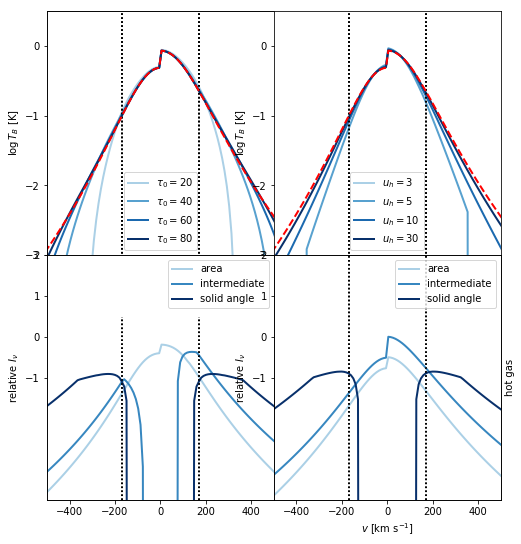

In [5]:
# thin=False
#######################################################################
# dependence on potential and expansion law
#######################################################################
u = np.linspace(-3, 3, 100)
# CO emission profiles
ex_a = ['area','intermediate', 'solid angle']

mdot = 10./(np.cos(30.*np.pi/180.)-np.cos(60.*np.pi/180.) )

fig = plt.figure(2, figsize=(9,8))    


# Plot
norm = colors.Normalize(vmin=-0.5, vmax=1)
cmap = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('Blues'))


# CO emission profiles
dm_a = ['radiation', 'hot gas']
tau0_a = [20., 40., 60, 80]
uh_a = [3., 5., 10., 30]
pot = 'isothermal'
ex = 'area'
CO_TB_default, error = wodp.em_line_spec(line='CO_2_1', phi=0, theta_in=30, theta_out=60, pos_t=0, pos_a=1, driver = 'ideal', mdot=100,expansion=ex, pot=pot, fc = 1., u = u)
fig = plt.figure(2, figsize=(4,6))       
# Plot
norm = colors.Normalize(vmin=-0.5, vmax=1)
cmap = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('Blues'))
# radiation
plt.subplot(2, 2, 1)
for i, tau0 in enumerate(tau0_a):
    # Get rgb value for this tXtw
    rgb = cmap.to_rgba(float(i)/(len(tau0_a)-1))
    print(tau0)
    CO_TB, error = wodp.em_line_spec(line='CO_2_1', phi=0, theta_in=30, theta_out=60, 
                              pos_t=0, pos_a=1, driver = 'radiation', mdot=100, tau0=tau0,
                              expansion=ex, pot=pot, fc = 1., u = u)
    plt.plot(u*v0/1e5, np.log10(CO_TB+1e-30), color=rgb, lw=2, label=r'$\tau_0=%.0f$'%tau0)
    plt.plot(np.ones(2)*v0/1e5, [-4, 0.5], 'k:')
    plt.plot(-np.ones(2)*v0/1e5, [-4, 0.5], 'k:')
    plt.legend()
plt.plot(u*v0/1e5,np.log10(CO_TB_default+1e-30), 'r--', lw=2)
plt.xlim([-500, 500])
plt.ylim([-3, 0.5])
plt.gca().set_yticks([-3, -2, -1, 0])
plt.ylabel(r'$\log\, T_B$ [K]')
ax = plt.gca().twinx()
ax.set_ylabel(dm_a[0])
ax.set_yticks([])
plt.subplot(2, 2, 2)  
for i, uh in enumerate(uh_a):  
    # Get rgb value for this tXtw
    rgb = cmap.to_rgba(float(i)/(len(uh_a)-1))
    print(uh)
    CO_TB, error = wodp.em_line_spec(line='CO_2_1', phi=0, theta_in=30, theta_out=60, 
                              pos_t=0, pos_a=1, driver = 'hot', mdot=100, uh=uh,
                              expansion=ex, pot=pot, fc = 1., u = u)
    plt.plot(u*v0/1e5, np.log10(CO_TB+1e-30), color=rgb, lw=2, label=r'$u_h=%.0f$'%uh)
    plt.plot(np.ones(2)*v0/1e5, [-4, 0.5], 'k:')
    plt.plot(-np.ones(2)*v0/1e5, [-4, 0.5], 'k:')
    plt.legend()
plt.plot(u*v0/1e5,np.log10(CO_TB_default+1e-30), 'r--', lw=2)
#plt.plot([50]*len(u),np.log10(CO_TB_default+1e-30), 'r--', lw=2)
plt.xlim([-500, 500])
plt.ylim([-3, 0.5])
plt.gca().set_xticks([-400, -200, 0, 200, 400])
plt.xlabel(r'$v$ [km s$^{-1}$]')
plt.gca().set_yticks([-3, -2, -1, 0])
plt.ylabel(r'$\log\, T_B$ [K]')

# radiation
plt.subplot(2, 2, 3)
for i, ex in enumerate(ex_a):
    # Get rgb value for this tXtw
    rgb = cmap.to_rgba(float(i)/(len(ex_a)-1))
    Ha, error = wodp.em_line_spec(line='CO_2_1', mach=100, phi=0, theta_in=30., theta_out=60, 
                              pos_t=0, pos_a=1, driver = 'ideal', mdot=mdot,
                              expansion=ex, pot='point', fc = 1., u = u)
    plt.plot(u*v0/1e5, np.log10(Ha+1e-30), color=rgb, lw=2, label=ex)
    plt.plot(np.ones(2)*v0/1e5, [-4, 0.5], 'k:')
    plt.plot(-np.ones(2)*v0/1e5, [-4, 0.5], 'k:')
    plt.legend()
plt.xlim([-500, 500])
plt.ylim([-4, -0.5])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.ylabel(r'relative $I_\nu$')
ax = plt.gca().twinx()
ax.set_ylabel(dm_a[0])
ax.set_yticks([])

plt.subplot(2, 2, 4)  
for i, ex in enumerate(ex_a):  
    # Get rgb value for this tXtw
    rgb = cmap.to_rgba(float(i)/(len(ex_a)-1))
    Ha, error = wodp.em_line_spec(line='CO_2_1', mach=100, phi=0, theta_in=30., theta_out=60, 
                              pos_t=0, pos_a=1, driver = 'ideal', mdot=mdot,
                              expansion=ex, pot='isothermal', fc = 1., u = u)
    plt.plot(u*v0/1e5, np.log10(Ha+1e-30), color=rgb, lw=2, label=ex)
    plt.plot(np.ones(2)*v0/1e5, [-4, 2.5], 'k:')
    plt.plot(-np.ones(2)*v0/1e5, [-4, 2.5], 'k:')
    plt.legend()
plt.xlim([-500, 500])
plt.ylim([-4, -0.5])

plt.gca().set_xticks([-400, -200, 0, 200, 400])
plt.xlabel(r'$v$ [km s$^{-1}$]')
plt.gca().set_yticks([-1, 0, 1, 2])
plt.ylabel(r'relative $I_\nu$')
ax = plt.gca().twinx()
ax.set_ylabel(dm_a[1])
ax.set_yticks([])
plt.subplots_adjust(hspace=0, wspace=0, left=0.2, top=0.95, bottom=0.1, right=0.9)
plt.savefig('depend_p_ex.pdf')

$\tau = \kappa_{\rm F} \bar{\Sigma}_0$

Gamma=0.03916316
(array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606, 

Gamma=0.15295026
(array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606, 

Gamma=0.02166895
(array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606, 

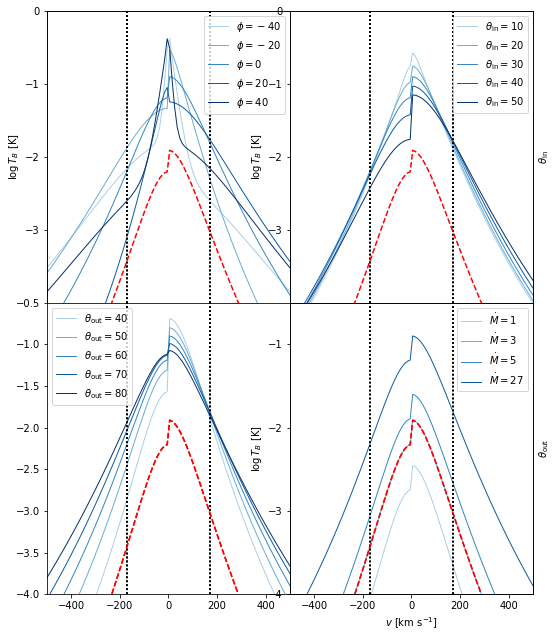

In [6]:
#######################################################################
# dependence on geometry and mass outflow rate
#######################################################################

#######################################################################
# dependence on dm
#######################################################################
u = np.linspace(-3, 3, 100)
# CO emission profiles
lb_a = [r'$\phi$',r'$\theta_{\rm in}$', r'$\theta_{\rm out}$']
phi_a = [-40, -20, 0, 20, 40]
theta_in_a = [10., 20., 30., 40., 50]
theta_out_a = [40., 50., 60., 70., 80.]
mdot_a = [.3, 1., 2., 10.] # real mass outflow rate

mdot = 1./(np.cos(30.*np.pi/180.)-np.cos(60.*np.pi/180.) )
CO_TB_default, error = wodp.em_line_spec(line='CO_1_0', phi=0, theta_in=30, theta_out=60, 
                                              pos_t=0, pos_a=1, driver = 'ideal', mdot=mdot,
                                              expansion='area', pot='isothermal', fc = 1., u = u)

fig = plt.figure(3, figsize=(9,9))       
# Plot
norm = colors.Normalize(vmin=-0.5, vmax=1)
cmap = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('Blues'))
# radiation
plt.subplot(2, 2, 1)
for i, phi in enumerate(phi_a):
    # Get rgb value for this tXtw
    rgb = cmap.to_rgba(float(i)/(len(phi_a)-1))
    mdot = 10./(np.cos(30.*np.pi/180.)-np.cos(60.*np.pi/180.) )
    CO_TB, error = wodp.em_line_spec(line='CO_1_0', phi=phi, theta_in=30, theta_out=60, 
                              pos_t=0, pos_a=1, driver = 'ideal', mdot=mdot,
                              expansion='area', pot='isothermal', fc = 1., u = u)
    plt.plot(u*v0/1e5, np.log10(CO_TB+1e-30), color=rgb, lw=1, label=r'$\phi=%.0f$'%phi)
    plt.plot(np.ones(2)*v0/1e5, [-4, 0.5], 'k:')
    plt.plot(-np.ones(2)*v0/1e5, [-4, 0.5], 'k:')
    plt.legend()
plt.plot(u*v0/1e5,np.log10(CO_TB_default+1e-30),'r--')
plt.xlim([-500, 500])
plt.ylim([-4, -0.5])
plt.gca().set_yticks([-3, -2, -1, 0])
plt.ylabel(r'$\log\, T_B$ [K]')
ax = plt.gca().twinx()
ax.set_ylabel(lb_a[0])
ax.set_yticks([])

plt.subplot(2, 2, 2)
for i, theta_in in enumerate(theta_in_a):
    # Get rgb value for this tXtw
    rgb = cmap.to_rgba(float(i)/(len(theta_in_a)-1))
    theta_out=60.
    mdot = 10./(np.cos(theta_in*np.pi/180.)-np.cos(theta_out*np.pi/180.) )
    CO_TB, error = wodp.em_line_spec(line='CO_1_0', phi=0, theta_in=theta_in, theta_out=theta_out, 
                              pos_t=0, pos_a=1, driver = 'ideal', mdot=mdot,
                              expansion='area', pot='isothermal', fc = 1., u = u)
    plt.plot(u*v0/1e5, np.log10(CO_TB+1e-30), color=rgb, lw=1, label=r'$\theta_{\rm in}=%.0f$'%theta_in)
    plt.plot(np.ones(2)*v0/1e5, [-4, 0.5], 'k:')
    plt.plot(-np.ones(2)*v0/1e5, [-4, 0.5], 'k:')
    plt.legend()
plt.plot(u*v0/1e5,np.log10(CO_TB_default+1e-30),'r--')
plt.xlim([-500, 500])
plt.ylim([-4, -0.5])
plt.gca().set_yticks([-3, -2, -1, 0])
plt.ylabel(r'$\log\, T_B$ [K]')
ax = plt.gca().twinx()
ax.set_ylabel(lb_a[1])
ax.set_yticks([])

plt.subplot(2, 2, 3)  
plt.plot(u*v0/1e5,np.log10(CO_TB_default+1e-30),'r--')
for i, theta_out in enumerate(theta_out_a):  
    # Get rgb value for this tXtw
    rgb = cmap.to_rgba(float(i)/(len(theta_out_a)-1))
    theta_in = 30.
    mdot = 10./(np.cos(theta_in*np.pi/180.)-np.cos(theta_out*np.pi/180.) )
    CO_TB, error = wodp.em_line_spec(line='CO_1_0', phi=0, theta_in=30, theta_out=theta_out, 
                              pos_t=0, pos_a=1, driver = 'ideal', mdot=mdot,
                              expansion='area', pot='isothermal', fc = 1., u = u)
    plt.plot(u*v0/1e5, np.log10(CO_TB+1e-30), color=rgb, lw=1, label=r'$\theta_{\rm out}=%.0f$'%theta_out)
    plt.plot(np.ones(2)*v0/1e5, [-4, 0.5], 'k:')
    plt.plot(-np.ones(2)*v0/1e5, [-4, 0.5], 'k:')
    plt.legend()
plt.plot(u*v0/1e5,np.log10(CO_TB_default+1e-30),'r--')
plt.xlim([-500, 500])
plt.ylim([-4, -0.5])


plt.subplot(2, 2, 4)  
plt.plot(u*v0/1e5,np.log10(CO_TB_default+1e-30),'r--')
for i, mdot in enumerate(mdot_a):  
    # Get rgb value for this tXtw
    rgb = cmap.to_rgba(float(i)/(len(theta_out_a)-1))
    mdot = mdot/(np.cos(30.*np.pi/180.)-np.cos(60.*np.pi/180.) )
    CO_TB, error = wodp.em_line_spec(line='CO_1_0', phi=0, theta_in=30, theta_out=60, 
                              pos_t=0, pos_a=1, driver = 'ideal', mdot=mdot,
                              expansion='area', pot='isothermal', fc = 1., u = u)
    plt.plot(u*v0/1e5, np.log10(CO_TB+1e-30), color=rgb, lw=1, label=r'$\dot{M}=%.0f$'%mdot)
    plt.plot(np.ones(2)*v0/1e5, [-4, 0.5], 'k:')
    plt.plot(-np.ones(2)*v0/1e5, [-4, 0.5], 'k:')
    plt.legend()
plt.plot(u*v0/1e5,np.log10(CO_TB_default+1e-30),'r--')
plt.xlim([-500, 500])
plt.ylim([-4, -0.5])

plt.gca().set_xticks([-400, -200, 0, 200, 400])
plt.xlabel(r'$v$ [km s$^{-1}$]')
plt.gca().set_yticks([-4, -3, -2, -1])
plt.ylabel(r'$\log\, T_B$ [K]')
ax = plt.gca().twinx()
ax.set_ylabel(lb_a[2])
ax.set_yticks([])
plt.subplots_adjust(hspace=0, wspace=0, left=0.15, top=0.95, bottom=0.05, right=0.9)
plt.savefig('depend_par.pdf')

## Mass outflow rate versus radius

In [5]:
# # dispersion of density PDF

def outflow_rate_a(a, mdot, u_c, theta1, theta2 ):
    [driver, pot, expansion] = theta1
    [phi, theta_in, theta_out, lg_mdot, tau0, uh, lg_mach] = theta2
    fc=1
    phi = phi/90.0*np.pi/2.0
    theta_in = theta_in/90.0*np.pi/2.0
    theta_out = theta_out/90.*np.pi/2.0
    mach = 10**lg_mach
    sx = sxMach(mach) 
    
    # create wind object
    mdot = 10**lg_mdot/ (np.cos(theta_in) - np.cos(theta_out)) * Msun/yr # isotropic
    eta = (np.cos(theta_in) - np.cos(theta_out)) * mdot / mdotstar
    Gamma = brentq(
        lambda g: zetaM(np.log(g), sxMach(mach))/epsff - eta,
        1e-6, 100.)
    pw = pwind(Gamma, mach, driver=driver, potential=pot, expansion=expansion, geometry='cone sheath', theta=theta_out, theta_in=theta_in, tau0=tau0, phi=phi, uh=uh, fcrit=fc)
    print('mass loading factor is %.2f'%eta)
    print('x_crit: %.2f'%np.log(Gamma))
    # mass outflow rate at radius a.
    x_m = pw.X(u_c, a)
    x_m[x_m!=x_m] = np.log(Gamma)
    outflow_rate = np.zeros(len(a))
    for i, xmxm in enumerate(x_m):
        x = np.linspace(np.log(Gamma)-300., np.log(Gamma), 3000)
        x1 = np.linspace(np.log(Gamma)-300, xmxm, 3000)
        frac = np.trapz(x1, pM(x1, sx)) / np.trapz(x, pM(x, sx))
        outflow_rate[i] = (np.cos(theta_in) - np.cos(theta_out)) * mdot * frac / (Msun/yr)
    print(frac)
    return outflow_rate




Wind solutions: Radiation, point, area

mass loading factor is 10.17
x_crit: -0.80
1.0
mass loading factor is 10.17
x_crit: -0.80
0.6077314259808275
[41.68693835 41.68693835 41.68693835 41.68693835 41.68693835 41.68693835
 41.68693835 41.68693835 41.68693835 41.68693835 41.68693835 41.68693835
 41.68693835 41.68693835 41.68693835 41.68693835 41.68693835 41.68693835
 41.68693835 41.68693835 41.68693835 41.68693835 41.68693835 41.68693835
 41.68693835 41.68693835 41.68693835 41.68693835 41.68693835 41.68693835
 41.68693835 41.68693835 41.68693835 41.68693835 41.68693835 41.68693835
 41.68693835 41.68693835 41.68693835 41.68693835 41.68693835 41.68693835
 41.68693835 41.68693835 41.68693835 41.68693835 41.68693835 41.68693835
 41.68693835 41.68693835 41.68693835 41.68693835 41.68693835 41.68693835
 41.68693835 41.68693835 41.68693835 41.68693835 41.68693835 41.68693835
 41.68693835 41.68693835 41.68693835 41.68693835 41.68693835 41.68693835
 41.68693835 41.68693835 41.68693835 41.68693835 41.68693835 41.68693835
 41.68693835 41

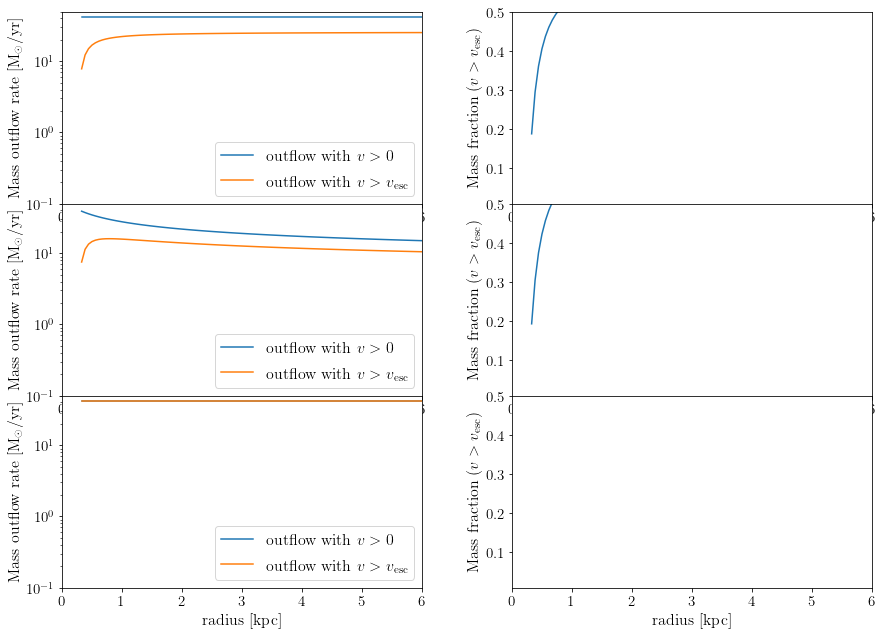

In [7]:
plt.figure(1, figsize=(15,10))

theta1_a = [['ideal', 'point', 'area'],
            ['ideal', 'isothermal', 'area'],
            ['ideal', 'isothermal', 'solid angle']]

for i in range(3):
    plt.subplot(3, 2, 2*i+1)  
    a = np.linspace(1.3, 24.,100)
    theta1 = theta1_a[i]
    theta2 = [-1.60, 25.19, 66.87, 1.62, 0, 0., 1.65] # phi, theta_in, theta_out, lg_mdot, tau0, uh, lg_mach

    mdot = 10**theta2[3]
    outf_r_a = outflow_rate_a(a, mdot, 0, theta1, theta2)
    outf_r_a2 = outflow_rate_a(a, mdot, 1, theta1, theta2)
 
    print(outf_r_a)
    plt.semilogy(a*0.25, outf_r_a, label=r'outflow with $v>0$')
    plt.semilogy(a*0.25, outf_r_a2, label = r'outflow with $v>v_{\rm esc}$')
    plt.xlabel("radius [kpc]",fontsize=16);
    plt.ylabel(r'Mass outflow rate [M$_\odot$/yr]',fontsize=16);
    plt.axis([0,6,1e-1,50.])
    plt.legend(loc='lower right', fontsize = '16')
    plt.tick_params(axis="y", labelsize=15);plt.tick_params(axis="x", labelsize=15)
    plt.subplots_adjust(hspace=0, wspace=0, left=0.15, top=0.95, bottom=0.15, right=0.9)

    plt.subplot(3, 2, 2*i+2)
    f_hvc = outf_r_a2/outf_r_a
    plt.plot(a*0.25, f_hvc)
    plt.xlabel("radius [kpc]",fontsize=16);
    plt.ylabel(r'Mass fraction ($v>v_{\rm esc}$)',fontsize=16);
    plt.axis([0,6,0.01,0.5])
    plt.tick_params(axis="y", labelsize=15);plt.tick_params(axis="x", labelsize=15)
    plt.subplots_adjust(hspace=0, wspace=0.25, left=0.15, top=0.95, bottom=0.15, right=0.9)



#plt.savefig('figure/f_hvc_a.pdf')

In [ ]:
['radiation', 'point', 'area'],
['radiation', 'isothermal', 'area'],
['radiation', 'isothermal', 'solid angle']]

In [13]:
sys.path.append('/Users/yuxuan/Desktop/mcmc_code/')
sys.path.append('/Users/yuxuan/Desktop/post_analysis')
import plot_util as pu
discard=0
nwalkers=0
line='CO_2_1'
obj='M82'
side='north'
dm = 'ideal'
p  = 'point'
ex = 'area'
sel_pol='best'
incl_mach=1
ndim, labels, samples, flat_samples, log_likelihood_samps, fit_par_best, fit_par_med, fit_par_w = pu.read_chain(\
                    line, obj, side, dm, p, ex, discard=discard, thin=1, nwalkers=nwalkers)

phi, theta_in, theta_out, lg_mdot, tau0, uh, lg_mach, mdot = eval('fit_par_'+sel_pol)
mach=10**lg_mach    

read chain successfully
CO_2_1 ideal
3397
fitted parameter best [-4.46018991 10.03801425 78.57394613  0.44462206  0.          0.
  0.99405173  3.53894698]
1.8340442299137962 [5.81564864 6.73270747]
22.964036539208966 [6.68334409 6.13720882]
66.30119521867191 [ 6.39166681 10.39805892]
0.6470487613332221 [0.25137377 0.16122189]
0.9063286233255008 [0.23907495 0.50179209]
fitted parameter medium [ 1.83404423 22.96403654 66.30119522  0.64704876  0.          0.
  0.90632862  8.55127759]


In [15]:

def Xfac_map(line, mach, phi, theta_in, theta_out, driver, uh, tau0, mdot, expansion,
                pot, sp_r, sp_res, side, fc=1.):
    phi = phi/90.0*np.pi/2.0
    theta_in = theta_in/90.0*np.pi/2.0
    theta_out = theta_out/90.*np.pi/2.0
    mdot = mdot*Msun/yr
    if line == 'CO_2_1':
        temp = 50.
    elif line == 'HI':
        temp = 5000.
    # create wind object
    md = mdot
    eta = (np.cos(theta_in) - np.cos(theta_out)) * md / mdotstar
    Gamma = brentq(
        lambda g: zetaM(np.log(g), sxMach(mach))/epsff - eta,
        1e-6, 100.)
    tw = m0 / mdot
    ex = expansion
    p = pot

    pw = pwind(Gamma, mach, driver=driver, potential=p,
               expansion=ex, geometry='cone sheath',
               theta=theta_out, theta_in=theta_in, phi=phi, tau0=tau0,
               uh=uh, fcrit=fc)

    
    sp_res_half = int((sp_res+1)/2)
    if side == 'both':
        varpi_a = np.linspace(sp_r*kpc, -sp_r*kpc, sp_res)/r0
        varpi_t = np.linspace(-sp_r*kpc, sp_r*kpc, sp_res)/r0
    elif side == 'north':
        varpi_a = np.linspace(0, sp_r*kpc, sp_res_half)/r0
        varpi_t = np.linspace(-sp_r*kpc, sp_r*kpc, sp_res)/r0
    elif side == 'south':
        varpi_a = np.linspace(-sp_r*kpc, 0, sp_res_half)/r0
        varpi_t = np.linspace(-sp_r*kpc, sp_r*kpc, sp_res)/r0

    vpt2, vpa2 = np.meshgrid(varpi_t, varpi_a, indexing='xy')

    if line == 'Halpha':
        # Cooling constant
        lam_e = 3.9e-25

    if (line == 'CO_1_0' or line == 'CO_2_1' or line == 'CO_3_2'):
        # Import the required molecular data
        co = emitter('CO', 1.1e-4)
        # Compute ppv
        X_aa = np.zeros((varpi_a.shape[0], varpi_t.shape[0]))
        # try:
        #    data = np.load('m82_%s_mdot%.0f_ex_%s_ppv.npz'%(line, mdot, ex))
        #    intTA = data['T_B']
        # except IOError:
        #    pass
        for i in range( len(varpi_a) ):
            for j in range(len(varpi_t)):
                print(i+j*sp_res)
                if line == 'CO_1_0':
                    X_aa[i, j] = pw.Xfac(temp, emit=co, tw=tw, trans=0,
                                        varpi=vpa2[i, j], varpi_t=vpt2[i, j], correlated=True, fw=None)
                elif line == 'CO_2_1':
                    X_aa[i, j] = pw.Xfac(temp, emit=co, tw=tw, muH=1.4, trans=1,
                                        varpi=vpa2[i, j], varpi_t=vpt2[i, j], correlated=True, fw=None)
                    #intTA_a_thin = pw.intTA_LTE(1.0, temp, emit=co, tw=tw, 
                    #                            varpi=vpa2[i, j], varpi_t=vpt2[i, j], thin=True)
                    #intTA_a = pw.intTA_LTE(1.0, temp, emit=co, tw=tw, varpi=vpa2[i, j], varpi_t=vpt2[i, j],)
                    #X_aa[i,j] = co.Xthin(trans=1) / co.levPop[2] * (intTA_a_thin / intTA_a)

                elif line == 'CO_3_2':
                    X_aa[i, j] = pw.Xfac(temp, emit=co, tw=tw, trans=2,
                                        varpi=vpa2[i, j], varpi_t=vpt2[i, j], correlated=True, fw=None)
    return X_aa



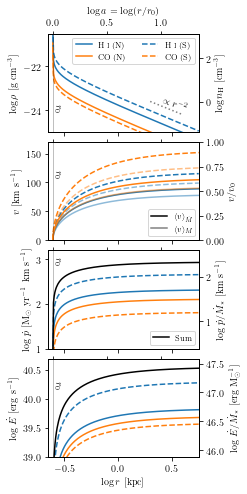

In [2]:
"""
Script to produce plots describing the wind in Yuan, Krumholz, & Martin (2021)
"""

from despotic.winds import pwind
from despotic import emitter
from numpy import cos
import matplotlib.pyplot as plt
import astropy.units as u
from multiprocessing import Pool, cpu_count

# Constants for the galaxy
M0 = 8.2e8 * u.Msun
v0 = 170 * u.km/u.s
r0 = 0.25 * u.kpc
SFR = 4.1 * u.Msun/u.yr

# Driver, expansion, potential, geometry choices for all cases
driver = 'ideal'
potential = 'point'
expansion = 'area'
geometry = 'cone sheath'


#####################################
# HI 21 cm -- North
#####################################

# Parameters for highest-likelihood model returned by the MCMC
GammaHIN = 0.28686539242939585
MachHIN = 10.**0.63285017
phiHIN = 7.40147048 * np.pi/180.  # Degree to radian
theta0HIN = 59.5415857 * np.pi/180.
theta1HIN = 82.44179159 * np.pi/180.
saHIN = 2.*np.pi*(cos(theta0HIN) - cos(theta1HIN))
MdotHIN = 13.95951217 * u.Msun / u.yr * saHIN/(4*np.pi)

# Construct pwind object representing model
pwHIN = pwind(GammaHIN, MachHIN, driver = driver, potential = potential,
              expansion = expansion, geometry = geometry,
              theta = theta1HIN, theta_in = theta0HIN,
              phi = phiHIN)

#####################################
# HI 21 cm -- South
#####################################

# Parameters for highest-likelihood model returned by the MCMC
GammaHIS = 0.24397622820600418
MachHIS = 10.**1.00832836
phiHIS = 8.10014953 * np.pi/180.  # Degree to radian
theta0HIS = 68.18541005 * np.pi/180.
theta1HIS = 81.3888468 * np.pi/180.
saHIS = 2.*np.pi*(cos(theta0HIS) - cos(theta1HIS))
MdotHIS = 41.09921085 * u.Msun / u.yr * saHIS/(4*np.pi)

# Construct pwind object representing model
pwHIS = pwind(GammaHIS, MachHIS, driver = driver, potential = potential,
              expansion = expansion, geometry = geometry,
              theta = theta1HIS, theta_in = theta0HIS,
              phi = phiHIS)


#####################################
# CO 2-1 -- North
#####################################

# Parameters for highest-likelihood model returned by the MCMC
GammaCON = 0.16356043722937696
MachCON = 10.**0.99405173
phiCON = -4.46018991 * np.pi/180.  # Degree to radian
theta0CON = 10.03801425 * np.pi/180.
theta1CON = 78.57394613 * np.pi/180.
saCON = 2.*np.pi*(cos(theta0CON) - cos(theta1CON))
MdotCON = 3.53894698 * u.Msun / u.yr * saCON/(4*np.pi)

# Construct pwind object representing model
pwCON = pwind(GammaCON, MachCON, driver = driver, potential = potential,
              expansion = expansion, geometry = geometry,
              theta = theta1CON, theta_in = theta0CON,
              phi = phiCON)

#####################################
# CO 2-1 -- South
#####################################

# Parameters for highest-likelihood model returned by the MCMC
GammaCOS = 0.040180202352394445
MachCOS = 10.**1.97971914
phiCOS = 16.4825320 * np.pi/180.  # Degree to radian
theta0COS = 8.39444821 * np.pi/180.
theta1COS = 51.7877410 * np.pi/180.
saCOS = 2.*np.pi*(cos(theta0COS) - cos(theta1COS))
MdotCOS = 2.74728123 * u.Msun / u.yr * saCOS/(4*np.pi)

# Construct pwind object representing model
pwCOS = pwind(GammaCOS, MachCOS, driver = driver, potential = potential,
              expansion = expansion, geometry = geometry,
              theta = theta1COS, theta_in = theta0COS,
              phi = phiCOS)

#####################################
# Compute profiles
#####################################

# Radial range
r = np.logspace(np.log10(0.25)+1e-5, 0.75, 200)*u.kpc
a = (r/r0).to('')

# Units and scalings from dimensionless to dimensional units
rhounit = u.g / u.cm**3
pdotunit = u.Msun/u.yr * u.km/u.s
Edotunit = u.erg/u.s
rhoHINscale = (MdotHIN / (saHIN * r0**2 * v0)).to(rhounit)
rhoCONscale = (MdotCON / (saCON * r0**2 * v0)).to(rhounit)
pdotHINscale = (MdotHIN * v0).to(pdotunit)
pdotCONscale = (MdotCON * v0).to(pdotunit)
EdotHINscale = (MdotHIN * v0**2).to(Edotunit)
EdotCONscale = (MdotCON * v0**2).to(Edotunit)
rhoHISscale = (MdotHIS / (saHIS * r0**2 * v0)).to(rhounit)
rhoCOSscale = (MdotCOS / (saCOS * r0**2 * v0)).to(rhounit)
pdotHISscale = (MdotHIS * v0).to(pdotunit)
pdotCOSscale = (MdotCOS * v0).to(pdotunit)
EdotHISscale = (MdotHIS * v0**2).to(Edotunit)
EdotCOSscale = (MdotCOS * v0**2).to(Edotunit)

# Profiles
rhoHIN = pwHIN.rho(a) * rhoHINscale
rhoCON = pwHIN.rho(a) * rhoCONscale
pdotHIN = pwHIN.pdot(a) * pdotHINscale
pdotCON = pwCON.pdot(a) * pdotCONscale
EdotHIN = pwHIN.Edot(a) * EdotHINscale
EdotCON = pwCON.Edot(a) * EdotCONscale
rhoHIS = pwHIS.rho(a) * rhoHISscale
rhoCOS = pwHIS.rho(a) * rhoCOSscale
pdotHIS = pwHIS.pdot(a) * pdotHISscale
pdotCOS = pwCOS.pdot(a) * pdotCOSscale
EdotHIS = pwHIS.Edot(a) * EdotHISscale
EdotCOS = pwCOS.Edot(a) * EdotCOSscale


#####################################
# Make plot
#####################################

xlim = np.array([-0.65, 0.75])
rholim = np.array([-25, -20.5])
vlim = np.array([0, 170])
pdotlim = np.array([1,3.2])
Edotlim = np.array([39, 40.7])

plt.figure(1, figsize=(3.5,7))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.clf()

# First panel: density
ax = plt.subplot(4,1,1)
ax.plot(np.log10(r/u.kpc), np.log10(rhoHIN/rhounit), 'C0',
        label=r"H~\textsc{i} (N)")
ax.plot(np.log10(r/u.kpc), np.log10(rhoCON/rhounit), 'C1',
        label=r"CO (N)")
ax.plot(np.log10(r/u.kpc), np.log10(rhoHIS/rhounit), 'C0--',
        label=r"H~\textsc{i} (S)")
ax.plot(np.log10(r/u.kpc), np.log10(rhoCOS/rhounit), 'C1--',
        label=r"CO (S)")
ax.plot([0.3, 0.6], -23.6 + np.array([0, -0.6]), 'k:', alpha=0.5)
ax.text(0.4, -24, "$\propto r^{-2}$", rotation=-20)
ax.plot(np.log10([0.25,0.25]), rholim, 'k', lw=1, alpha=0.25)
ax.text(np.log10(0.25)+0.02, -24, r"$r_0$", rotation=-90)
ax.set_xlim(xlim)
ax.set_ylim(rholim)
ax.set_ylabel(r"$\log\rho$ [g cm$^{-3}$]")
ax.legend(ncol=2, fontsize=8)
ax.set_xticklabels([])
tx = plt.twinx(ax)
tx.set_ylim(rholim - np.log10(2.34e-24))
tx.set_ylabel(r"$\log n_\mathrm{H}$ [cm$^{-3}$]")
ty = plt.twiny(ax)
ty.set_xlim(xlim - np.log10(0.25))
ty.set_xlabel(r"$\log a = \log(r/r_0)$")

# Second panel: mean velocity
ax = plt.subplot(4,1,2)
ax.plot(np.log10(r/u.kpc), np.sqrt(2*EdotHIN/MdotHIN).to(u.km/u.s), 'C0')
ax.plot(np.log10(r/u.kpc), np.sqrt(2*EdotHIS/MdotHIS).to(u.km/u.s), 'C0--')
ax.plot(np.log10(r/u.kpc), (pdotHIN/MdotHIN).to(u.km/u.s), 'C0', alpha=0.5)
ax.plot(np.log10(r/u.kpc), (pdotHIS/MdotHIS).to(u.km/u.s), 'C0--', alpha=0.5)
ax.plot(np.log10(r/u.kpc), np.sqrt(2*EdotCON/MdotCON).to(u.km/u.s), 'C1')
ax.plot(np.log10(r/u.kpc), np.sqrt(2*EdotCOS/MdotCOS).to(u.km/u.s), 'C1--')
ax.plot(np.log10(r/u.kpc), (pdotCON/MdotCON).to(u.km/u.s), 'C1', alpha=0.5)
ax.plot(np.log10(r/u.kpc), (pdotCOS/MdotCOS).to(u.km/u.s), 'C1--', alpha=0.5)
ax.plot(np.log10([0.25,0.25]), vlim, 'k', lw=1, alpha=0.25)
ax.text(np.log10(0.25)+0.02, 110, r"$r_0$", rotation=-90)
ax.plot([-100,-100], [-100,-100], 'k', label=r"$\langle v\rangle_{\dot{M}}$")
ax.plot([-100,-100], [-100,-100], 'k', alpha=0.5, label=r"$\langle v\rangle_M$")
ax.legend(fontsize=8)
ax.set_xlim(xlim)
ax.set_ylim(vlim)
ax.set_ylabel(r"$v$ [km s$^{-1}$]")
ax.set_xticklabels([])
tx = plt.twinx(ax)
tx.set_ylim( vlim / (v0/(u.km/u.s)) )
tx.set_ylabel(r"$v/v_0$")
ty = plt.twiny(ax)
ty.set_xlim(xlim - np.log10(0.25))
ty.set_xticklabels([])

# Third panel: momentum flux
ax = plt.subplot(4,1,3)
ax.plot(np.log10(r/u.kpc), np.log10(pdotHIN/pdotunit), 'C0')
ax.plot(np.log10(r/u.kpc), np.log10(pdotCON/pdotunit), 'C1')
ax.plot(np.log10(r/u.kpc), np.log10(pdotHIS/pdotunit), 'C0--')
ax.plot(np.log10(r/u.kpc), np.log10(pdotCOS/pdotunit), 'C1--')
ax.plot(np.log10(r/u.kpc),
        np.log10((pdotHIN + pdotHIS + pdotCON + pdotCOS)/pdotunit),
        'k', label=r"Sum")
ax.plot(np.log10([0.25,0.25]), pdotlim, 'k', lw=1, alpha=0.25)
ax.text(np.log10(0.25)+0.02, 2.9, r"$r_0$", rotation=-90)
ax.set_xlim(xlim)
ax.set_ylim(pdotlim)
ax.legend(ncol=2, fontsize=8)
ax.set_ylabel(r"$\log\, \dot{p}$ [M$_\odot$ yr$^{-1}$ km s$^{-1}$]")
ax.set_xticklabels([])
tx = plt.twinx(ax)
tx.set_ylim( np.log10((10.**pdotlim*pdotunit/SFR) / (u.km/u.s)) )
tx.set_ylabel(r"$\log\, \dot{p}/\dot{M}_*$ [km s$^{-1}$]")
ty = plt.twiny(ax)
ty.set_xlim(xlim - np.log10(0.25))
ty.set_xticklabels([])

# Fourth panel: energy flux
ax = plt.subplot(4,1,4)
ax.plot(np.log10(r/u.kpc), np.log10(EdotHIN/Edotunit), 'C0')
ax.plot(np.log10(r/u.kpc), np.log10(EdotCON/Edotunit), 'C1')
ax.plot(np.log10(r/u.kpc), np.log10(EdotHIS/Edotunit), 'C0--')
ax.plot(np.log10(r/u.kpc), np.log10(EdotCOS/Edotunit), 'C1--')
ax.plot(np.log10(r/u.kpc),
        np.log10((EdotHIN + EdotCON + EdotHIS + EdotCOS)/Edotunit),
        'k')
ax.plot(np.log10([0.25,0.25]), Edotlim, 'k', lw=1, alpha=0.25)
ax.text(np.log10(0.25)+0.02, 40.2, r"$r_0$", rotation=-90)
ax.set_xlim(xlim)
ax.set_ylim(Edotlim)
ax.set_ylabel(r"$\log\,\dot{E}$ [erg s$^{-1}$]")
ax.set_xlabel(r"$\log r$ [kpc]")
tx = plt.twinx(ax)
tx.set_ylim( np.log10((10.**Edotlim*Edotunit/SFR) / (u.erg/u.Msun)) )
tx.set_ylabel(r"$\log\,\dot{E}/\dot{M}_*$ [erg M$_\odot^{-1}$]")
ty = plt.twiny(ax)
ty.set_xlim(xlim - np.log10(0.25))
ty.set_xticklabels([])

# Final spacing asjustment
plt.subplots_adjust(left=0.2, right=0.8, bottom=0.08, top=0.92, hspace=0.1)

# Save
plt.savefig("wind_structure.pdf")




In [ ]:
x = np.linspace(0, 10, 20)
z = np.linspace(0, 10, 20)
xx, zz = np.meshgrid(x, z)
args = [b for b in np.broadcast(xx.flat, zz.flat)]

[(0.0, 0.0), (0.5263157894736842, 0.0), (1.0526315789473684, 0.0), (1.5789473684210527, 0.0), (2.1052631578947367, 0.0), (2.631578947368421, 0.0), (3.1578947368421053, 0.0), (3.6842105263157894, 0.0), (4.2105263157894735, 0.0), (4.7368421052631575, 0.0), (5.263157894736842, 0.0), (5.789473684210526, 0.0), (6.315789473684211, 0.0), (6.842105263157895, 0.0), (7.368421052631579, 0.0), (7.894736842105263, 0.0), (8.421052631578947, 0.0), (8.947368421052632, 0.0), (9.473684210526315, 0.0), (10.0, 0.0), (0.0, 0.5263157894736842), (0.5263157894736842, 0.5263157894736842), (1.0526315789473684, 0.5263157894736842), (1.5789473684210527, 0.5263157894736842), (2.1052631578947367, 0.5263157894736842), (2.631578947368421, 0.5263157894736842), (3.1578947368421053, 0.5263157894736842), (3.6842105263157894, 0.5263157894736842), (4.2105263157894735, 0.5263157894736842), (4.7368421052631575, 0.5263157894736842), (5.263157894736842, 0.5263157894736842), (5.789473684210526, 0.5263157894736842), (6.315789473

/Users/yuxuan/Documents/Research_module/despotic/despotic/winds/pwind.py:2499: RuntimeWarning: invalid value encountered in double_scalars
  X = emit.Xthin(trans=trans) * Psi_thin / (fi * Psi)


(0.5263157894736842, 0.5263157894736842)
(1.0526315789473684, 0.5263157894736842)
(1.5789473684210527, 0.5263157894736842)
(2.1052631578947367, 0.5263157894736842)
(2.631578947368421, 0.5263157894736842)
(3.1578947368421053, 0.5263157894736842)
(3.6842105263157894, 0.5263157894736842)
(4.2105263157894735, 0.5263157894736842)
(4.7368421052631575, 0.5263157894736842)
(5.263157894736842, 0.5263157894736842)
(5.789473684210526, 0.5263157894736842)
(6.315789473684211, 0.5263157894736842)
(6.842105263157895, 0.5263157894736842)
(7.368421052631579, 0.5263157894736842)
(7.894736842105263, 0.5263157894736842)
(8.421052631578947, 0.5263157894736842)
(8.947368421052632, 0.5263157894736842)
(9.473684210526315, 0.5263157894736842)
(10.0, 0.5263157894736842)
(0.0, 1.0526315789473684)
(0.5263157894736842, 1.0526315789473684)
(1.0526315789473684, 1.0526315789473684)
(1.5789473684210527, 1.0526315789473684)
(2.1052631578947367, 1.0526315789473684)
(2.631578947368421, 1.0526315789473684)
(3.157894736842

(6.315789473684211, 5.789473684210526)
(6.842105263157895, 5.789473684210526)
(7.368421052631579, 5.789473684210526)
(7.894736842105263, 5.789473684210526)
(8.421052631578947, 5.789473684210526)
(8.947368421052632, 5.789473684210526)
(9.473684210526315, 5.789473684210526)
(10.0, 5.789473684210526)
(0.0, 6.315789473684211)
(0.5263157894736842, 6.315789473684211)
(1.0526315789473684, 6.315789473684211)
(1.5789473684210527, 6.315789473684211)
(2.1052631578947367, 6.315789473684211)
(2.631578947368421, 6.315789473684211)
(3.1578947368421053, 6.315789473684211)
(3.6842105263157894, 6.315789473684211)
(4.2105263157894735, 6.315789473684211)
(4.7368421052631575, 6.315789473684211)
(5.263157894736842, 6.315789473684211)
(5.789473684210526, 6.315789473684211)
(6.315789473684211, 6.315789473684211)
(6.842105263157895, 6.315789473684211)
(7.368421052631579, 6.315789473684211)
(7.894736842105263, 6.315789473684211)
(8.421052631578947, 6.315789473684211)
(8.947368421052632, 6.315789473684211)
(9.47

(0.5263157894736842, 1.5789473684210527)
(1.0526315789473684, 1.5789473684210527)
(1.5789473684210527, 1.5789473684210527)
(2.1052631578947367, 1.5789473684210527)
(2.631578947368421, 1.5789473684210527)
(3.1578947368421053, 1.5789473684210527)
(3.6842105263157894, 1.5789473684210527)
(4.2105263157894735, 1.5789473684210527)
(4.7368421052631575, 1.5789473684210527)
(5.263157894736842, 1.5789473684210527)
(5.789473684210526, 1.5789473684210527)
(6.315789473684211, 1.5789473684210527)
(6.842105263157895, 1.5789473684210527)
(7.368421052631579, 1.5789473684210527)
(7.894736842105263, 1.5789473684210527)
(8.421052631578947, 1.5789473684210527)
(8.947368421052632, 1.5789473684210527)
(9.473684210526315, 1.5789473684210527)
(10.0, 1.5789473684210527)
(0.0, 2.1052631578947367)
(0.5263157894736842, 2.1052631578947367)
(1.0526315789473684, 2.1052631578947367)
(1.5789473684210527, 2.1052631578947367)
(2.1052631578947367, 2.1052631578947367)
(2.631578947368421, 2.1052631578947367)
(3.157894736842

(6.842105263157895, 6.842105263157895)
(7.368421052631579, 6.842105263157895)
(7.894736842105263, 6.842105263157895)
(8.421052631578947, 6.842105263157895)
(8.947368421052632, 6.842105263157895)
(9.473684210526315, 6.842105263157895)
(10.0, 6.842105263157895)
(0.0, 7.368421052631579)
(0.5263157894736842, 7.368421052631579)
(1.0526315789473684, 7.368421052631579)
(1.5789473684210527, 7.368421052631579)
(2.1052631578947367, 7.368421052631579)
(2.631578947368421, 7.368421052631579)
(3.1578947368421053, 7.368421052631579)
(3.6842105263157894, 7.368421052631579)
(4.2105263157894735, 7.368421052631579)
(4.7368421052631575, 7.368421052631579)
(5.263157894736842, 7.368421052631579)
(5.789473684210526, 7.368421052631579)
(6.315789473684211, 7.368421052631579)
(6.842105263157895, 7.368421052631579)
(7.368421052631579, 7.368421052631579)
(7.894736842105263, 7.368421052631579)
(8.421052631578947, 7.368421052631579)
(8.947368421052632, 7.368421052631579)
(9.473684210526315, 7.368421052631579)
(10.0

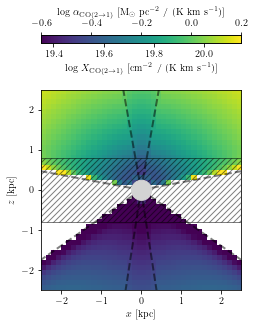

In [11]:

#####################################
# CO 2-1 X factor calculation
#####################################

# Set properties of molecules
T = 50.                                 # Temp
abd = 1.1e-4                            # CO abundance
mCO = 2.34e-24*u.g / abd                # Mass per CO molecule
em = emitter('CO', abd)                 # Read CO molecular data
em.setLevPopLTE(T)                      # Set level populations in LTE
tX = em.tX(mCO/u.g)[1]*u.s              # t_X value for the 2-1 transition
Xthin = em.Xthin()[1]                   # X_CO in optically thin limit
MdotCON_iso = MdotCON * 4*np.pi/(saCON) # Isotropic mass loss rate
twN = (M0/MdotCON_iso).to(u.s)          # Wind mass removal timescale
MdotCOS_iso = MdotCOS * 4*np.pi/(saCOS) # Isotropic mass loss rate
twS = (M0/MdotCOS_iso).to(u.s)          # Wind mass removal timescale


# Compute grid in parallel
x = np.linspace(0, 10, 20)
z = np.linspace(0, 10, 20)
xx, zz = np.meshgrid(x, z)
args = [b for b in np.broadcast(xx.flat, zz.flat)]
print(args)
def XfacNFunc(arg):
    print(arg)
    return pwCON.Xfac(T, em, twN, varpi=arg[1], varpi_t=arg[0], trans=1)
def XfacSFunc(arg):
    print(arg)
    return pwCOS.Xfac(T, em, twS, varpi=arg[1], varpi_t=arg[0], trans=1)
try:
    XfacN = np.load("XfacN.npy")
except:
    if __name__ == '__main__':
        print(cpu_count())
        #with Pool(cpu_count()) as p:
        #    XfacN = p.map(XfacNFunc, args)
        XfacN = [XfacNFunc(a) for a in args]  # Serial version
        XfacN = np.array(XfacN).reshape(xx.shape)
        np.save("XfacN.npy", XfacN)
try:
    XfacS = np.load("XfacS.npy")
except:
    print(cpu_count())
    if __name__ == '__main__':
        #with Pool(cpu_count()) as p:
        #    XfacS = p.map(XfacSFunc, args)
        XfacS = [XfacSFunc(a) for a in args]  # Serial version
        XfacS = np.array(XfacS).reshape(xx.shape)
        np.save("XfacS.npy", XfacS)

# Plot
plt.figure(2, figsize=(3.5,4.6))
NHlim = np.array([19.3497, 20.15])
alphalim = np.log10(10.**NHlim * 2.34e-24 / (1.99e33/3.09e18**2))
plt.clf()
plt.imshow(np.ma.masked_where(XfacN==0.0, np.log10(XfacN)),
           vmin=NHlim[0], vmax=NHlim[1], origin='lower',
           extent=[0,2.5,0,2.5], aspect='equal')
plt.imshow(np.ma.masked_where(XfacN[:,::-1]==0.0, np.log10(XfacN)[:,::-1]),
           vmin=NHlim[0], vmax=NHlim[1], origin='lower',
           extent=[-2.5,0,0,2.5], aspect='equal')
plt.imshow(np.ma.masked_where(XfacS==0.0, np.log10(XfacS))[::-1,:],
           vmin=NHlim[0], vmax=NHlim[1], origin='lower',
           extent=[0,2.5,-2.5,0], aspect='equal')
plt.imshow(np.ma.masked_where(XfacS==0.0, np.log10(XfacS))[::-1,::-1],
           vmin=NHlim[0], vmax=NHlim[1], origin='lower',
           extent=[-2.5,0,-2.5,0], aspect='equal')
xtmp = np.array([0,2.5])

m = np.sqrt( (np.cos(2*theta1CON) + np.cos(2*phiCON)) /
             (1 - np.cos(2*theta1CON)) )
plt.plot(xtmp, m*xtmp, 'k--', lw=2, alpha=0.5)
plt.plot(-xtmp, m*xtmp, 'k--', lw=2, alpha=0.5)
m = np.sqrt( (np.cos(2*theta0CON) + np.cos(2*phiCON)) /
             (1 - np.cos(2*theta0CON)) )
plt.plot(xtmp, m*xtmp, 'k--', lw=2, alpha=0.5)
plt.plot(-xtmp, m*xtmp, 'k--', lw=2, alpha=0.5)
m = np.sqrt( (np.cos(2*theta1COS) + np.cos(2*phiCOS)) /
             (1 - np.cos(2*theta1COS)) )
plt.plot(xtmp, -m*xtmp, 'k--', lw=2, alpha=0.5)
plt.plot(-xtmp, -m*xtmp, 'k--', lw=2, alpha=0.5)
m = np.sqrt( (np.cos(2*theta0COS) + np.cos(2*phiCOS)) /
             (1 - np.cos(2*theta0COS)) )
plt.plot(xtmp, -m*xtmp, 'k--', lw=2, alpha=0.5)
plt.plot(-xtmp, -m*xtmp, 'k--', lw=2, alpha=0.5)
xtmp = np.linspace(-0.25, 0.25, 200)
plt.fill_between(xtmp, np.sqrt(0.25**2-xtmp**2), -np.sqrt(0.25**2-xtmp**2),
                 color="lightgray", zorder=3)
plt.fill_between([-2.5,2.5], [0.8, 0.8], [-0.8,-0.8], facecolor='none',
                 edgecolor='k', hatch='////', alpha=0.5)
plt.xlim([-2.5,2.5])
plt.ylim([-2.5,2.5])
plt.xlabel(r'$x$ [kpc]')
plt.ylabel(r'$z$ [kpc]')

# Adjust position to make room for color bar
pos = plt.gca().get_position()
pos.y0 -= 0.2
pos.x0 += 0.03
pos.x1 += 0.05
plt.gca().set_position(pos)

# Add color bar
pos = plt.gca().get_position()
pos.y0 = pos.y1 + 0.14
pos.y1 = pos.y0 + 0.025
axcbar = plt.axes(pos)
cbar = plt.colorbar(orientation='horizontal', cax=axcbar)
cbar.ax.set_xlabel(
    r'$\log\,X_{\mathrm{CO}(2\to 1)}$ [cm$^{-2}$ / (K km s$^{-1}$)]')
cbarax2 = cbar.ax.twiny()
cbarax2.set_xlim(alphalim)
cbarax2.set_xlabel(
    r'$\log\,\alpha_{\mathrm{CO}(2\to 1)}$ [M$_\odot$ pc$^{-2}$ / (K km s$^{-1}$)]')
    
# Save
plt.savefig('XCO.pdf')

